In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
df = pd.read_csv("Heart_Disease.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df_features = df[["male", "age", "cigsPerDay", "prevalentStroke", "diabetes", "totChol", "BMI", "heartRate", "TenYearCHD"]]

In [6]:
df_features.shape


(4240, 9)

In [7]:
df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   cigsPerDay       4211 non-null   float64
 3   prevalentStroke  4240 non-null   int64  
 4   diabetes         4240 non-null   int64  
 5   totChol          4190 non-null   float64
 6   BMI              4221 non-null   float64
 7   heartRate        4239 non-null   float64
 8   TenYearCHD       4240 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 298.2 KB


In [8]:
df_features.isnull().sum()

male                0
age                 0
cigsPerDay         29
prevalentStroke     0
diabetes            0
totChol            50
BMI                19
heartRate           1
TenYearCHD          0
dtype: int64

In [9]:
df_features.dropna(axis=0, inplace = True)

C:\Users\Aderonke Adeniyi\AppData\Local\Temp\ipykernel_34672\3993439965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.dropna(axis=0, inplace = True)


In [10]:
df_features.isnull().sum()

male               0
age                0
cigsPerDay         0
prevalentStroke    0
diabetes           0
totChol            0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [11]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4142 entries, 0 to 4239
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4142 non-null   int64  
 1   age              4142 non-null   int64  
 2   cigsPerDay       4142 non-null   float64
 3   prevalentStroke  4142 non-null   int64  
 4   diabetes         4142 non-null   int64  
 5   totChol          4142 non-null   float64
 6   BMI              4142 non-null   float64
 7   heartRate        4142 non-null   float64
 8   TenYearCHD       4142 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 323.6 KB


In [12]:
X = df_features.iloc[:,:-1]
y = df_features.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split   

splitted the data into the traon set and test set before scaling/transforming,
the fit method helps your model learn the data

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
sc = MinMaxScaler()

In [16]:
sc.fit(X_train, y_train)

MinMaxScaler()

In [17]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [18]:
dr = DecisionTreeClassifier(max_depth = 30,random_state = 12, class_weight="balanced")

In [19]:
dr.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30, random_state=12)

In [20]:
y_pred = dr.predict(X_test)

In [21]:
f1_score(y_test,y_pred)

0.18960244648318042

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       875
           1       0.19      0.19      0.19       161

    accuracy                           0.74      1036
   macro avg       0.52      0.52      0.52      1036
weighted avg       0.75      0.74      0.75      1036



In [23]:
#visualising the tree
import graphviz
from sklearn import tree

In [24]:
dot_data = tree.export_graphviz(dr,out_file= None, feature_names=df_features.columns[:-1], filled=True)

In [25]:
graph = graphviz.Source(dot_data, format  = "png")
graph.render("decision_tree_graphviz")

'decision_tree_graphviz.png'

In [26]:
import matplotlib.pyplot as plt

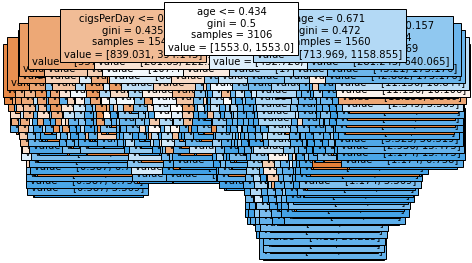

In [27]:
# visualizing with plot_tree
plot_tree(dr,feature_names=df_features.columns[:-1], filled=True, fontsize=10)
plt.show()